# 🏏 IPL 2025 Exploratory Data Analysis

## Project Overview:

This notebook explores player and team performance in the IPL 2025 season using match-level and ball-by-ball delivery data. The goal is to uncover trends, answer key cricket questions, and visualize patterns using Python.

We’ll analyze top scorers, wicket takers, team strategies (like toss decisions), stage-wise performance, and much more.



## Dataset Details

### Match-Level Data (`matches.csv`):
This file contains summary information about each match.

- `match_id`: Unique match identifier
- `team1`, `team2`: Competing teams
- `toss_winner`: Team that won the toss
- `toss_decision`: Decision to bat or field
- `match_winner`: Team that won the match
- `player_of_the_match`: Best performer of the match
- `stage`: League, Playoffs, or Final
- `first_ings_score`, `second_ings_score`: Team totals
- Additional columns for wickets and top individual stats

---

### Delivery-Level Data (`deliveries.csv`):
This file contains ball-by-ball details of every delivery bowled in the season.

- `match_no`, `over`: Match and over number
- `bowler`, `striker`: Bowler and batsman involved
- `runs_of_bat`, `extras`: Runs scored off the bat and extras
- `wicket_type`: Type of dismissal (if any)
- `player_dismissed`, `fielder`: Dismissal details (if any)


These two datasets combined provide rich context for detailed match and player-level analysis.



## Dataset Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

In [ ]:
deliveries

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17178,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,19.2,Shashank Singh,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
17179,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,19.3,Shashank Singh,Hazlewood,6,0,0,0,0,0,NaN,NaN,NaN
17180,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,19.4,Shashank Singh,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
17181,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,19.5,Shashank Singh,Hazlewood,6,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
matches = pd.read_csv('/content/matches.csv')

In [ ]:
matches

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,completed,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,completed,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,completed,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,completed,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43


## Data Cleaning

Before beginning the analysis, we cleaned the data by:

- Checking for missing values in both datasets
- Dropping rows with critical missing info (like missing match winner)
- Removing duplicates if any
- Ensuring correct data types (e.g., converting dates to datetime)
- Filtering out irrelevant or null values where necessary

These steps ensured the quality and reliability of the insights we generated in the EDA.


In [ ]:
deliveries.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team',
       'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide',
       'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed',
       'fielder'],
      dtype='object')

In [ ]:
matches.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner',
       'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match',
       'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [ ]:
matches.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,1
toss_decision,0
first_ings_score,1
first_ings_wkts,1


In [ ]:
matches.duplicated().sum()

np.int64(0)

In [ ]:
# Drop rows missing core match outcome info
matches_cleaned = matches.dropna(subset=[
    'toss_winner',
    'first_ings_score',
    'second_ings_score',
    'match_winner',
    'player_of_the_match'
])

In [ ]:
matches_cleaned = matches_cleaned.drop(columns=[
    'wb_runs', 'wb_wickets', 'balls_left'
])

In [ ]:
matches_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 73
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             71 non-null     int64  
 1   date                 71 non-null     object 
 2   venue                71 non-null     object 
 3   team1                71 non-null     object 
 4   team2                71 non-null     object 
 5   stage                71 non-null     object 
 6   toss_winner          71 non-null     object 
 7   toss_decision        71 non-null     object 
 8   first_ings_score     71 non-null     float64
 9   first_ings_wkts      71 non-null     float64
 10  second_ings_score    71 non-null     float64
 11  second_ings_wkts     71 non-null     float64
 12  match_result         71 non-null     object 
 13  match_winner         71 non-null     object 
 14  player_of_the_match  71 non-null     object 
 15  top_scorer           71 non-null     object 
 1

In [ ]:
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17183 entries, 0 to 17182
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_no          17183 non-null  int64  
 1   date              17183 non-null  object 
 2   stage             17183 non-null  object 
 3   venue             17183 non-null  object 
 4   batting_team      17183 non-null  object 
 5   bowling_team      17183 non-null  object 
 6   innings           17183 non-null  int64  
 7   over              17183 non-null  float64
 8   striker           17183 non-null  object 
 9   bowler            17183 non-null  object 
 10  runs_of_bat       17183 non-null  int64  
 11  extras            17183 non-null  int64  
 12  wide              17183 non-null  int64  
 13  legbyes           17183 non-null  int64  
 14  byes              17183 non-null  int64  
 15  noballs           17183 non-null  int64  
 16  wicket_type       872 non-null    object

In [ ]:
deliveries.isnull().sum()


,0
match_no,0
date,0
stage,0
venue,0
batting_team,0
bowling_team,0
innings,0
over,0
striker,0
bowler,0


In [ ]:
deliveries.duplicated().sum()

np.int64(0)

## EDA
In this section, we analyze the IPL 2025 data to uncover patterns and insights related to:
- Player performances
- Team strategies
- Toss impact
- Stage-wise outcomes

Each subsection focuses on answering one key question using visuals and statistics.

### 1.Top 10 Run Scorers

In [ ]:
deliveries.head(3)

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
top_scorers = deliveries.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10)

In [ ]:
top_scorers

,runs_of_bat
striker,
Sai Sudharsan,759
Suryakumar Yadav,717
Kohli,657
Shubman Gill,650
Mitchell Marsh,627
Shreyas Iyer,604
Jaiswal,559
Prabhsimran,549
Rahul,546


/tmp/ipython-input-29-206688192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='viridis')


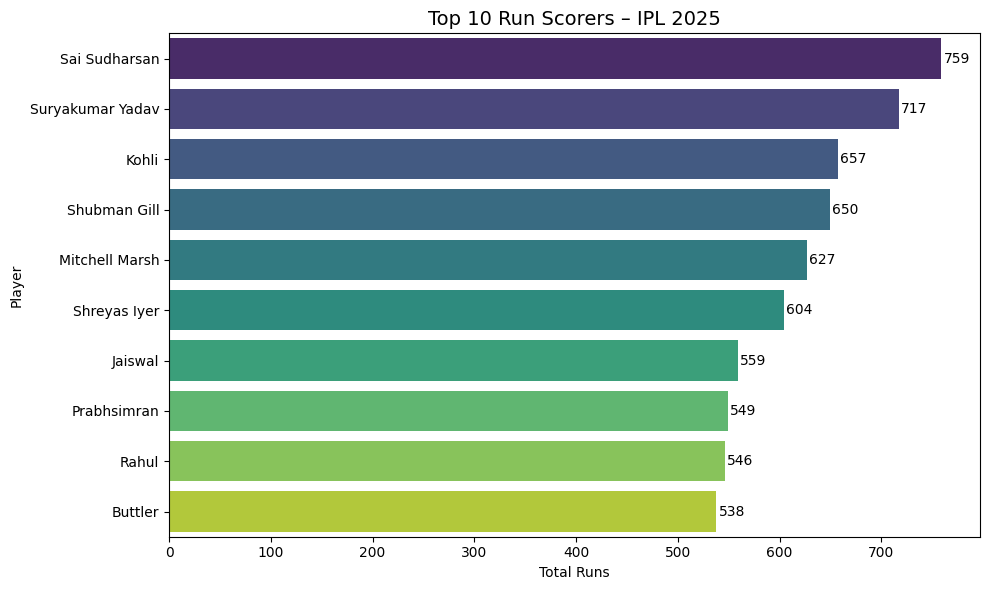

In [ ]:
# Set style
plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='viridis')

# Add titles and labels
plt.title('Top 10 Run Scorers – IPL 2025', fontsize=14)
plt.xlabel('Total Runs')
plt.ylabel('Player')

# Add value labels
for index, value in enumerate(top_scorers.values):
    plt.text(value + 2, index, str(value), va='center')

plt.tight_layout()
plt.show()


**Observation:**

- Sai Sudharsan topped the chart with 759 runs, showing exceptional consistency throughout the season.
- Suryakumar Yadav and Kohli also crossed the 650-run mark, indicating strong top-order contributions.
- The presence of multiple Indian players like Gill, Iyer, and Jaiswal highlights solid domestic performances.

### 2.Top 10 Wicket Takers

In [ ]:
deliveries.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [ ]:
deliveries.sample(3)

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
6246,27,"Apr 12, 2025",League stage,"Rajiv Gandhi International Stadium, Hyderabad",PBKS,SRH,1,7.1,Nehal Wadhera,Zeeshan Ansari,1,0,0,0,0,0,NaN,NaN,NaN
8492,36,"Apr 19, 2025",League stage,"Sawai Mansingh Stadium, Jaipur",RR,LSG,2,15.1,Riyan Parag,Avesh Khan,0,0,0,0,0,0,NaN,NaN,NaN
4872,21,"Apr 08, 2025",League stage,"Eden Gardens, Kolkata",LSG,KKR,1,18.3,Miller,Harshit Rana,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
wicket_deliveries = deliveries[
    (deliveries['player_dismissed'].notna()) &
    (deliveries['wicket_type'] != 'run out')
]

In [ ]:
wicket_deliveries

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma
62,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,9.6,Narine,Rasikh Salam,0,0,0,0,0,0,caught,Narine,Jitesh Sharma
65,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,10.3,Rahane,Krunal Pandya,0,0,0,0,0,0,caught,Rahane,Rasikh Salam
76,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,12.1,Venkatesh Iyer,Krunal Pandya,0,0,0,0,0,0,bowled,Venkatesh Iyer,NaN
93,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,14.6,Rinku Singh,Krunal Pandya,0,0,0,0,0,0,bowled,Rinku Singh,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17118,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,9.4,Shreyas Iyer,Shepherd,0,0,0,0,0,0,caught,Shreyas Iyer,Jitesh Sharma
17134,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,12.1,Josh Inglis,Krunal Pandya,0,0,0,0,0,0,caught,Josh Inglis,Livingstone
17160,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,16.2,Nehal Wadhera,Bhuvneshwar,0,0,0,0,0,0,caught,Nehal Wadhera,Krunal Pandya
17162,74,"Jun 03, 2025",Playoffs stage,"Narendra Modi Stadium, Ahmedabad",PBKS,RCB,2,16.4,Stoinis,Bhuvneshwar,0,0,0,0,0,0,caught,Stoinis,Yash Dayal


In [ ]:
# Define wicket types credited to bowlers
valid_wicket_types = ['caught', 'bowled', 'lbw', 'stumped', 'hit wicket']

# Filter deliveries where a credited dismissal occurred
wickets = deliveries[deliveries['wicket_type'].isin(valid_wicket_types)]

# Count wickets per bowler
top_wicket_takers = (
    wickets.groupby('bowler')['wicket_type']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

print(top_wicket_takers)


bowler
Prasidh           25
Noor Ahmad        24
Hazlewood         22
Boult             22
Arshdeep Singh    21
Sai Kishore       19
Bumrah            18
Bhuvneshwar       17
Vaibhav Arora     17
Krunal Pandya     17
Name: wicket_type, dtype: int64


/tmp/ipython-input-36-3551162739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='crest')


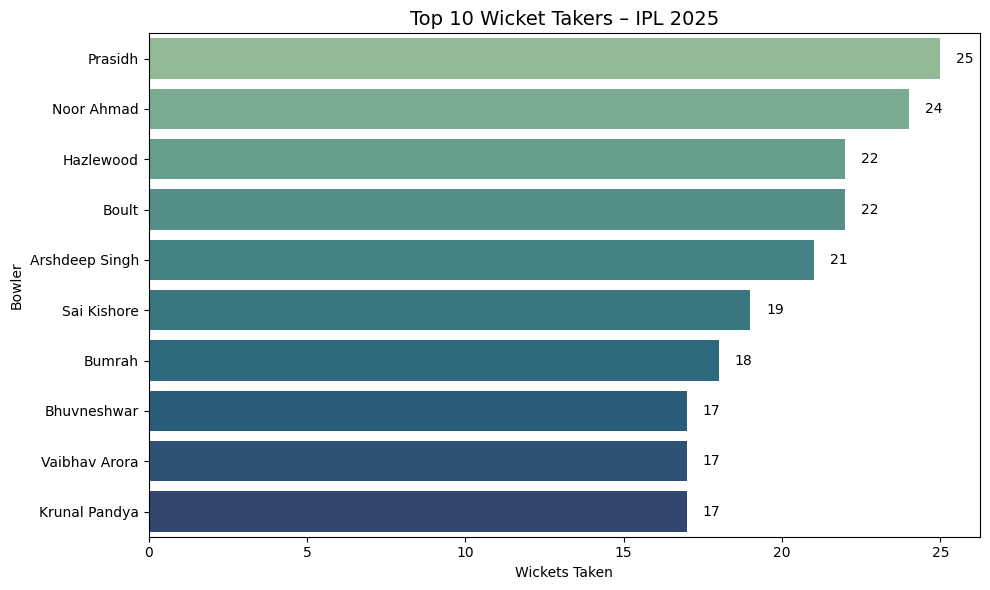

In [ ]:
# Set up the figure
plt.figure(figsize=(10,6))
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='crest')

# Titles and labels
plt.title('Top 10 Wicket Takers – IPL 2025', fontsize=14)
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')

# Annotate each bar with its value
for i, value in enumerate(top_wicket_takers.values):
    plt.text(value + 0.5, i, str(value), va='center')

plt.tight_layout()
plt.show()


**Observation:**

- Prasidh Krishna led the wicket charts with 25 dismissals, closely followed by Noor Ahmad with 24.
- Bowlers like Hazlewood and Boult also made strong impacts with 22 wickets each.
- A mix of pacers and spinners highlights the balanced nature of bowling effectiveness in IPL 2025.


### 3.Toss Winner vs Match Winner

In [ ]:
matches['toss_and_match_winner'] = matches['toss_winner'] == matches['match_winner']


In [ ]:
matches

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,toss_and_match_winner
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,True
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,False
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,True
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,True
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74,True
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17,True
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42,True
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43,True


In [ ]:
toss_match_link = matches['toss_and_match_winner'].value_counts()
print(toss_match_link)
percent_link = toss_match_link / toss_match_link.sum() * 100
percent_link = percent_link.round(1)
print(percent_link)

toss_and_match_winner
True     42
False    32
Name: count, dtype: int64
toss_and_match_winner
True     56.8
False    43.2
Name: count, dtype: float64


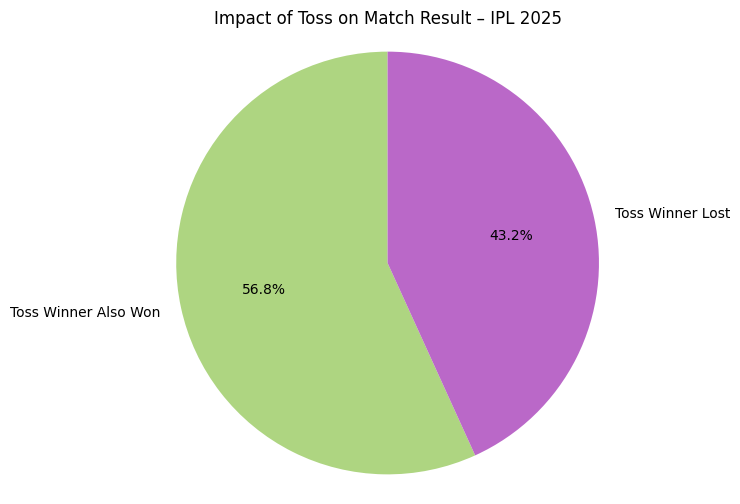

In [ ]:
import matplotlib.pyplot as plt

labels = ['Toss Winner Also Won', 'Toss Winner Lost']
colors = ['#AED581', '#BA68C8']  # Pistachio Green, Lavender Violet





plt.figure(figsize=(6, 6))
plt.pie(percent_link, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Impact of Toss on Match Result – IPL 2025')
plt.axis('equal')  # Equal aspect ratio makes pie circular
plt.show()


**Observation:**

- Teams that won the toss also won the match around **57% of the time**, suggesting a slight advantage.
- However, since the split isn't overly dominant, the toss isn't a guaranteed predictor of match success.


### 4.Win percentage by team



In [ ]:
matches

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,toss_and_match_winner
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,True
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,False
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,True
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,True
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74,True
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17,True
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42,True
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43,True


In [ ]:
# Count appearances in team1 and team2
team1_counts = matches['team1'].value_counts()
team2_counts = matches['team2'].value_counts()

# Total matches played by each team
matches_played = team1_counts.add(team2_counts, fill_value=0).astype(int)


In [ ]:
matches_won = matches['match_winner'].value_counts()


In [ ]:
team_stats = pd.DataFrame({
    'matches_played': matches_played,
    'matches_won': matches_won
})

# Fill missing values (some teams may have 0 wins)
team_stats.fillna(0, inplace=True)

# Calculate win percentage
team_stats['win_percent'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

# Sort by win percentage
team_stats = team_stats.sort_values(by='win_percent', ascending=False)


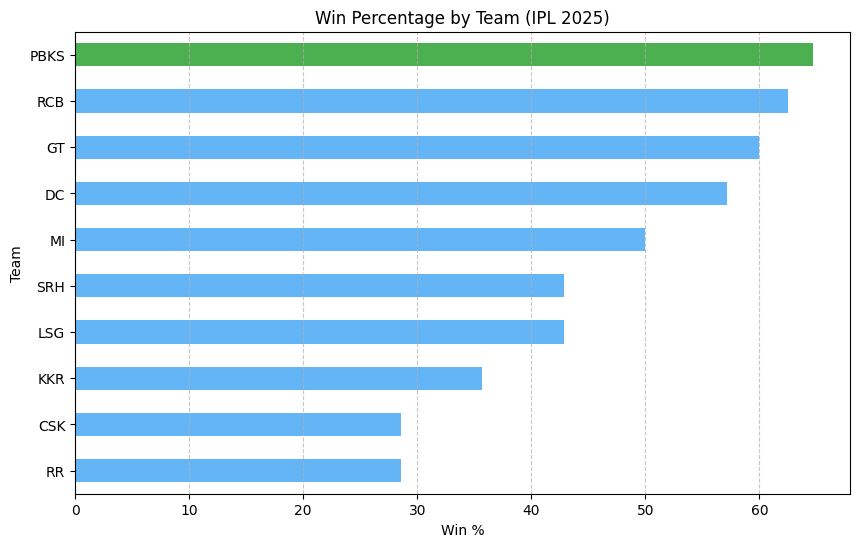

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = ['#64b5f6' if x < team_stats['win_percent'].max() else '#4caf50' for x in team_stats['win_percent']]
team_stats['win_percent'].plot(kind='barh', color=colors)

plt.title('Win Percentage by Team (IPL 2025)')
plt.xlabel('Win %')
plt.ylabel('Team')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Observation:**

- PBKS emerged as the most successful team with a win percentage of 65%.
- RCB and GT closely followed, both maintaining over 60% win rates.
- RR and CSK had the lowest win percentages, indicating a challenging season for them.


### 5.Roles of Player of the Match (POTM) Winners



In [ ]:
matches['player_of_the_match'].value_counts().head(25)

,count
player_of_the_match,
Krunal Pandya,3
Shreyas Iyer,3
Ishan Kishan,2
Noor Ahmad,2
Prasidh Krishna,2
KL Rahul,2
Rajat Patidar,2
Prabhsimran Singh,2
Mitchell Starc,2


In [ ]:
player_roles = {
    'Krunal Pandya': 'All-Rounder',
    'Shreyas Iyer': 'Batsman',
    'Ishan Kishan': 'Batsman',
    'Noor Ahmad': 'Bowler',
    'Prasidh Krishna': 'Bowler',
    'KL Rahul': 'Batsman',
    'Rajat Patidar': 'Batsman',
    'Prabhsimran Singh': 'Batsman',
    'Mitchell Starc': 'Bowler',
    'Mohammed Siraj': 'Bowler',
    'Sai Sudarshan': 'Batsman',
    'Abhishek Sharma': 'All-Rounder',
    'Sunil Narine': 'All-Rounder',
    'Shubman Gill': 'Batsman',
    'Will Jacks': 'All-Rounder',
    'Rohit Sharma': 'Batsman',
    'Shardul Thakur': 'All-Rounder',
    'Ashwani Kumar': 'Bowler',
    'Nitish Rana': 'Batsman',
    'Ashutosh Sharma': 'Batsman',
    'Quinton de Kock': 'Batsman',
    'Priyansh Arya': 'Batsman',
    'Nicholas Pooran': 'Batsman',
    'Jofra Archer': 'Bowler',
    'Digvesh Singh': 'Bowler'
}


In [ ]:
matches['potm_role'] = matches['player_of_the_match'].map(player_roles)


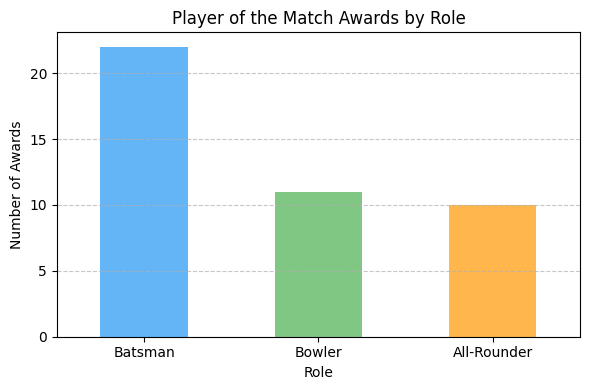

In [ ]:
# Count the number of POTM awards per role
role_counts = matches['potm_role'].value_counts()

# Plot a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
colors = ['#64b5f6', '#81c784', '#ffb74d']  # Batsman, Bowler, All-Rounder

role_counts.plot(kind='bar', color=colors)
plt.title('Player of the Match Awards by Role')
plt.xlabel('Role')
plt.ylabel('Number of Awards')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Observation:**

- Batsmen dominated the Player of the Match awards, winning over twice as many as bowlers and all-rounders.
- This suggests that impactful batting performances had a greater influence on match outcomes in IPL 2025.


### 6.Stage-wise performance

In [ ]:
matches['stage'].unique()


array(['League', 'Playoffs', 'Final'], dtype=object)

In [ ]:
stage_wins = matches.groupby(['stage', 'match_winner']).size().reset_index(name='win_count')

In [ ]:
stage_wins_pivot = stage_wins.pivot(index='match_winner', columns='stage', values='win_count').fillna(0)


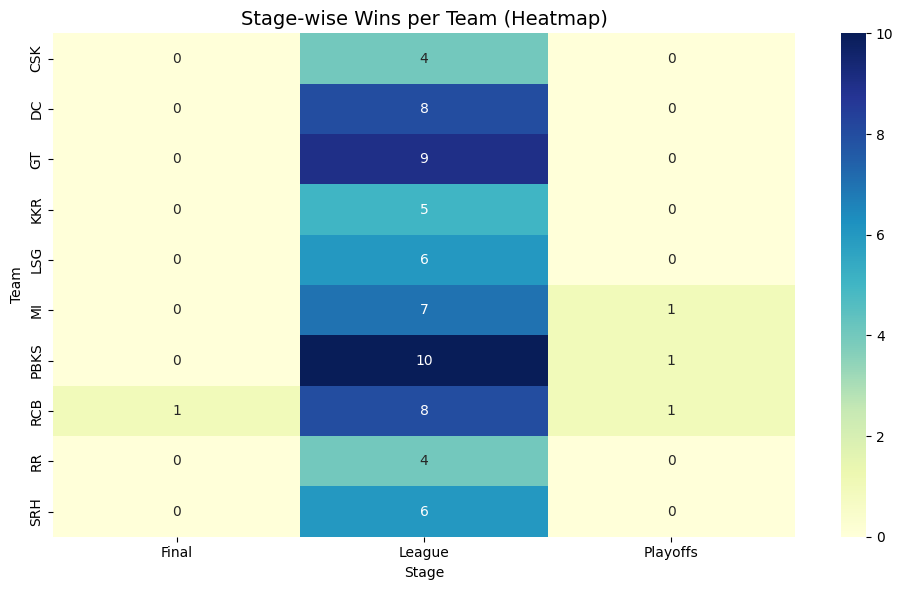

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(stage_wins_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Stage-wise Wins per Team (Heatmap)', fontsize=14)
plt.ylabel('Team')
plt.xlabel('Stage')
plt.tight_layout()
plt.show()


**Observation:**

- PBKS dominated the league stage with 10 wins, and also secured a playoff victory.
- RCB was the only team to win a final, highlighting their success in the knockout stage.
- Most teams struggled beyond the league stage, indicating a steep drop-off in performance during playoffs.


### 7.Impact of Toss Decision (Bat vs Field) on Win Percentage

In [ ]:
toss_df = matches[matches['toss_winner'] == matches['match_winner']]


In [ ]:
toss_decision_win_counts = toss_df['toss_decision'].value_counts()


In [ ]:
total_toss_decisions = matches['toss_decision'].value_counts()


In [ ]:
toss_win_percent = (toss_decision_win_counts / total_toss_decisions) * 100
toss_win_percent = toss_win_percent.round(2)


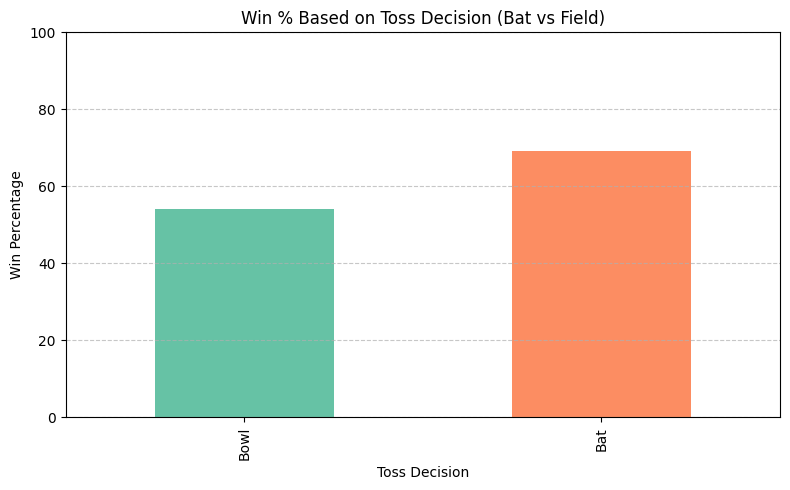

In [ ]:
toss_win_percent.plot(kind='bar', color=['#66c2a5', '#fc8d62'], figsize=(8,5))
plt.title('Win % Based on Toss Decision (Bat vs Field)')
plt.ylabel('Win Percentage')
plt.xlabel('Toss Decision')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observation:**

- Teams choosing to bat after winning the toss had a noticeably higher win percentage (69%) compared to those who chose to bowl (54%).
- This suggests that setting a target might have been a more successful strategy during IPL 2025.


### 8.Most Economical Bowlers

In [ ]:
# Sum of runs conceded (excluding extras like legbyes, byes)
bowler_runs = deliveries.groupby('bowler')['runs_of_bat'].sum()


In [ ]:
# Only count legal deliveries
legal_deliveries = deliveries[(deliveries['wide'] == 0) & (deliveries['noballs'] == 0)]
balls_bowled = legal_deliveries.groupby('bowler').size()


In [ ]:
# Overs = balls / 6
overs_bowled = balls_bowled / 6


In [ ]:
economy_rate = (bowler_runs / overs_bowled).sort_values()


In [ ]:
# Filter to avoid misleading rates (min 10 overs = 60 balls)
valid_bowlers = overs_bowled[overs_bowled >= 10]
economy_valid = economy_rate[valid_bowlers.index].head(10)


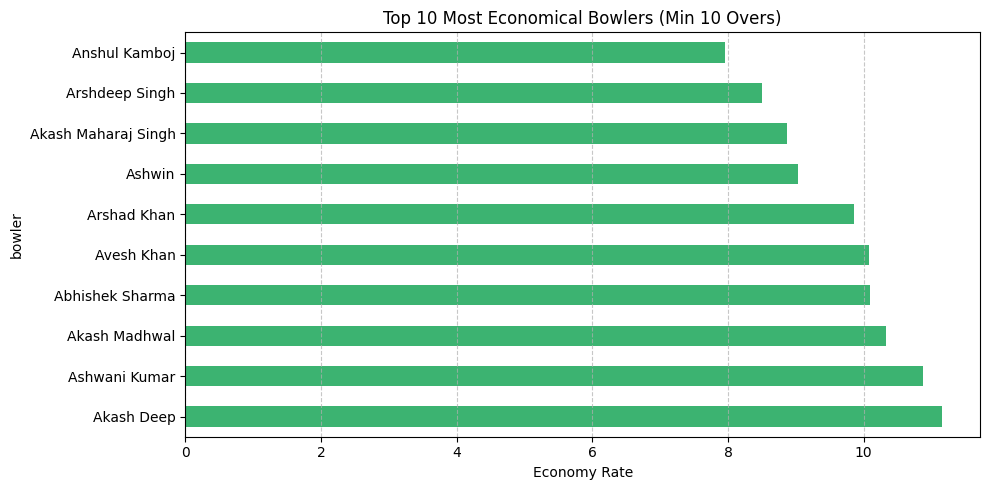

In [ ]:
plt.figure(figsize=(10,5))
economy_valid.sort_values().plot(kind='barh', color='mediumseagreen')
plt.xlabel('Economy Rate')
plt.title('Top 10 Most Economical Bowlers (Min 10 Overs)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Observation:**

- Anshul Kamboj stood out with the best economy rate, conceding under 8 runs per over.
- Arshdeep Singh and Akash Maharaj Singh also maintained tight spells, proving crucial in restricting opponents.
- Most economical bowlers were not necessarily the highest wicket-takers, highlighting the importance of control and pressure.


## **Final Summary & Insights**

This IPL 2025 Exploratory Data Analysis revealed several key patterns and performance trends:

- Sai Sudharsan, Suryakumar Yadav, and Virat Kohli led the batting charts, emphasizing the value of strong top-order contributions.

- Prasidh Krishna and Noor Ahmad dominated the bowling attack, while economical bowlers like Anshul Kamboj and Arshdeep Singh maintained tight control despite fewer wickets.

- PBKS emerged as the most consistent team during the league stage, while RCB stood out for clinching victory in the final.

- Toss decisions played a moderate role, with batting first offering a tactical edge in win probability.

- Player of the Match awards were mostly secured by batsmen, highlighting their match-winning influence.

- The transition from league stage to playoffs saw many teams struggle, suggesting pressure handling is a key differentiator.

This analysis not only spotlighted individual brilliance but also uncovered strategic trends like toss impact and performance consistency across stages — making it valuable for teams, fans, and analysts alike.

